In [2]:
'''
Tegar Imansyah
MNIST with tensorflow and keras

ref:
1. https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
2. http://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from net.lenet import LeNet
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import keras.preprocessing.image as image


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    trainData = trainData.reshape(trainData.shape[0], 1, img_rows, img_cols)
    testData = testData.reshape(testData.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainData = trainData.reshape(trainData.shape[0], img_rows, img_cols, 1)
    testData = testData.reshape(testData.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

trainData = trainData.astype('float32')
testData = testData.astype('float32')
trainData /= 255.0 # Merubah scaling 0 - 255 menjadi 0 - 1.0
testData /= 255.0

print('trainData shape:', trainData.shape)
print(trainData.shape[0], 'train samples')
print(testData.shape[0], 'test samples')

# convert class vectors to binary class matrices
trainLabels = keras.utils.to_categorical(trainLabels, num_classes)
testLabels = keras.utils.to_categorical(testLabels, num_classes)

trainData shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
print("[INFO] drawing networks...")
model = LeNet.build(input_shape=input_shape, classes=num_classes,
    weightsPath=None)

print("[INFO] compiling...")
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

[INFO] drawing networks...
[INFO] compiling...


In [5]:
print("[INFO] training...")
model.fit(trainData, trainLabels,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validation_data=(testData, testLabels))
print("[INFO] evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

[INFO] training...
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s - loss: 0.3376 - acc: 0.8959 - val_loss: 0.0798 - val_acc: 0.9757
Epoch 2/12
60000/60000 [==============================] - 4s - loss: 0.1115 - acc: 0.9671 - val_loss: 0.0505 - val_acc: 0.9833
Epoch 3/12
60000/60000 [==============================] - 4s - loss: 0.0824 - acc: 0.9758 - val_loss: 0.0415 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 4s - loss: 0.0700 - acc: 0.9789 - val_loss: 0.0393 - val_acc: 0.9866
Epoch 5/12
60000/60000 [==============================] - 4s - loss: 0.0603 - acc: 0.9824 - val_loss: 0.0351 - val_acc: 0.9877
Epoch 6/12
60000/60000 [==============================] - 4s - loss: 0.0559 - acc: 0.9829 - val_loss: 0.0347 - val_acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 4s - loss: 0.0513 - acc: 0.9850 - val_loss: 0.0319 - val_acc: 0.9887
Epoch 8/12
60000/60000 [==================

In [8]:
print(testData[0].shape)

(28, 28, 1)


[[  9.63510843e-07   2.65504605e-06   1.57636311e-03   9.98353362e-01
    7.33594305e-08   1.00455634e-06   7.10801373e-07   5.59760556e-05
    7.65966706e-06   1.30309797e-06]]


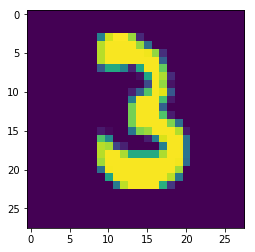

[INFO] Predicted:3, Actual: 3
[[  1.15041354e-08   1.13954954e-07   2.15732712e-07   9.99990821e-01
    3.61415564e-09   2.27981832e-06   8.36824388e-10   1.41811640e-07
    1.35159439e-06   5.04803302e-06]]


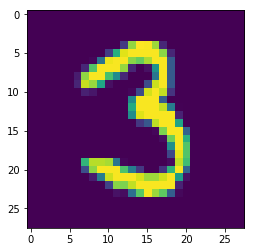

[INFO] Predicted:3, Actual: 3
[[  9.86624915e-09   3.50730893e-08   9.99998927e-01   1.59038542e-08
    1.91142963e-10   5.99290582e-14   3.82356473e-12   1.11017607e-06
    1.34020235e-08   1.21501975e-11]]


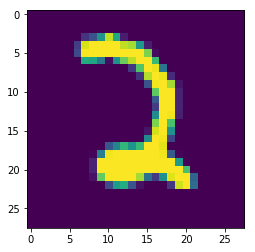

[INFO] Predicted:2, Actual: 2
[[  3.65604116e-08   4.30845297e-08   2.60180322e-09   5.13212528e-10
    1.79790356e-06   1.91693257e-08   4.45541416e-11   9.99984980e-01
    1.13951835e-08   1.31011820e-05]]


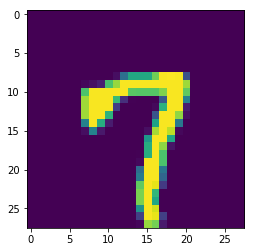

[INFO] Predicted:7, Actual: 7
[[  4.24746194e-09   1.87130070e-07   4.74494506e-08   6.09630717e-07
    4.10652603e-04   5.40217684e-07   1.71648570e-10   8.61157241e-05
    6.54071337e-05   9.99436438e-01]]


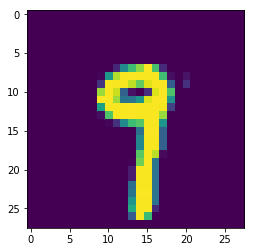

[INFO] Predicted:9, Actual: 9
[[  4.83477480e-09   9.99959111e-01   4.48799511e-07   8.36597636e-08
    2.65258568e-05   8.32461126e-07   6.74785667e-07   1.72864517e-07
    1.21167268e-05   1.59581290e-08]]


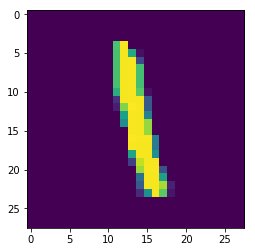

[INFO] Predicted:1, Actual: 1
[[  5.30224642e-10   2.43057883e-07   9.99999046e-01   5.56526402e-07
    2.40256981e-10   3.33624513e-12   2.76561898e-11   1.01089714e-08
    6.65929676e-08   4.51803352e-11]]


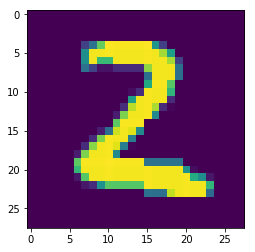

[INFO] Predicted:2, Actual: 2
[[  5.15890195e-12   3.48175742e-12   3.44753698e-10   1.28143459e-11
    4.73885819e-10   1.27240191e-10   7.72143547e-12   4.84170412e-11
    1.00000000e+00   3.52717477e-09]]


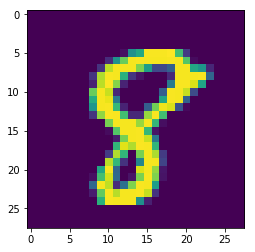

[INFO] Predicted:8, Actual: 8
[[  2.41228975e-08   9.54770396e-09   9.38877349e-08   4.86709606e-09
    4.18432862e-08   2.32122849e-10   1.98364849e-12   9.99999642e-01
    2.23881053e-10   2.41676759e-07]]


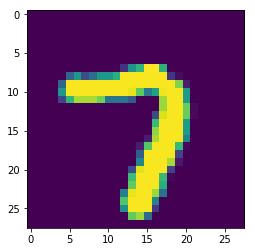

[INFO] Predicted:7, Actual: 7
[[  2.01834372e-13   4.60327577e-14   4.82823337e-10   3.70958646e-12
    2.45636740e-11   4.39489460e-12   8.01949381e-14   3.66177661e-12
    1.00000000e+00   1.64088321e-09]]


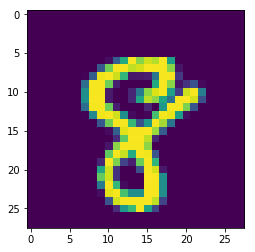

[INFO] Predicted:8, Actual: 8


In [13]:
for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
    # classify the digit
    probs = model.predict(testData[np.newaxis, i])
    print(probs)
    prediction = probs.argmax(axis=1)
    
    # resize the image from a 28 x 28 image to a 96 x 96 image so we
    # can better see it
    img = image.array_to_img(testData[i] * 255)
    plt.imshow(img)
    plt.show()
    # show the image and prediction
    print("[INFO] Predicted:" + str(prediction[0]) + ", Actual: " + str(np.argmax(testLabels[i])))